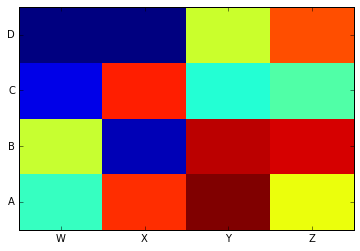

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
column_labels = list('ABCD')
row_labels = list('WXYZ')
data = np.random.rand(4,4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

In [54]:
import datetime as dt
import util
import pandas as pd
import seaborn as sns; sns.set()

sd = dt.date(2008,1,1)
ed = dt.datetime(2017,12,31)
dates = pd.date_range(sd, ed)
syms = ['GOOG','AAPL','FSPTX','FCYIX','FSENX','FIDSX']
util.update_data(syms)
df = util.get_data(syms,dates)

In [3]:
sd in df.index

False

In [43]:
def profitmap(year,df):
    A=np.zeros( (365,365) )
    for x in range(0,365):
        for y in range(0,365):
            sd = dt.date(year,1,1)+dt.timedelta(x)
            ed = dt.date(year,1,1)+dt.timedelta(y)
            if y<x:
                ed = dt.date(year,1,1)+dt.timedelta(y+365)
            if sd in df.index and ed in df.index:
                A[x][y]=(df.loc[ed]/df.loc[sd]) -1
    return A


In [35]:
maps = map(profitmap,range(2005,2017))
A=sum(maps)
A=A/len(maps)
df2 = pd.DataFrame(A,index=range(0,365))

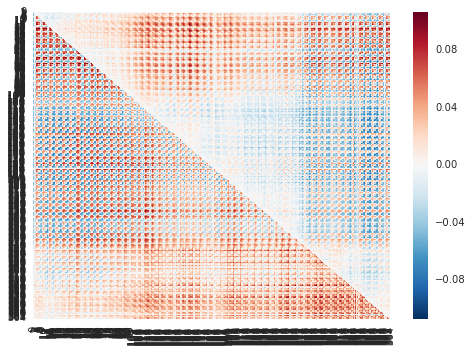

In [55]:
goog_profitmap = lambda x: profitmap(x,df['FSENX'])
maps = map(goog_profitmap,range(2005,2017))
A=sum(maps)
A=A/len(maps)
ax = sns.heatmap(A)

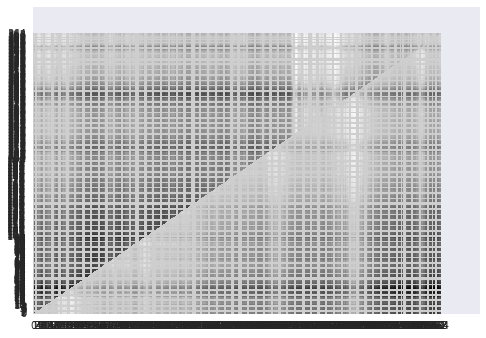

In [31]:
     
column_labels = range(0,365)
row_labels = range(0,365)
fig, ax = plt.subplots()
heatmap = ax.pcolor(A)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(A.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(A.shape[1])+0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()



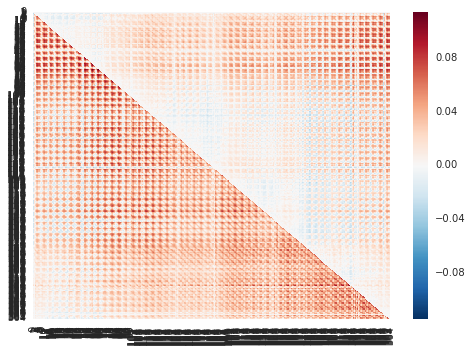

In [36]:
ax = sns.heatmap(df2)